The objective of this mini-project is the creation of three supervised classification models, by applying the principles of machine learning on a data set.

# Data understanding

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
train= 'train.csv'
test= 'test.csv'
# load the csv file as a data frame
data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

In [3]:
# The first ten lines of the Data Set
print('--------------------------------- Train ata ------------------------------------')
display (data_train.head(10))
print('--------------------------------- Test Data -------------------------------------')
display (data_test.head(10))

--------------------------------- Train ata ------------------------------------


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


--------------------------------- Test Data -------------------------------------


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


Description and analysis of train data

In [4]:
print('Total number of learning instances : ',data_train.shape[0])
print('Total number of learning attributes : ',data_train.shape[1])

Total number of learning instances :  32561
Total number of learning attributes :  15


For numeric variables:

In [5]:
num_cols = ['age', 'fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
data_train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
educational-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


For categorical variables:

In [6]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country','income']
data_train[cat_cols].describe().T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
gender,32561,2,Male,21790
native-country,32561,42,United-States,29170
income,32561,2,<=50K,24720


# Visualization

After running the train data analysis, I'm going to do some processing on our original data (train) because I noticed that the observation values have spaces for object type attributes.

I will convert the target to a value (0/1).

In [7]:
#This function to avoid the spaces that exist in our train data
def delete_space(dataframe):
    for i in dataframe.columns:
        try:
            dataframe[i] = dataframe[i].str.strip()
        except AttributeError:
            # data is not a string, cannot strip
            dataframe[i] = dataframe[i]

delete_space(data_train)

In [8]:
#class 0 for values <= 50K
#class 1 for values> 50K

from collections import Counter
data_train['income'] = data_train['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
# summarize the class distribution
target_train = data_train['income']
counter = Counter(target_train)
for k,v in counter.items():
    per = v / len(target_train) * 100
    print('Class= %s, Count= %d, Percentage= %.3f%%' % (k, v, per))

Class= 0, Count= 24720, Percentage= 75.919%
Class= 1, Count= 7841, Percentage= 24.081%


---> Visualization of missing values

In [9]:
data = data_train.isin(['?']).sum(axis=0)
data = dict(data)
# summarize the class distribution
for i in data:
    per = data[i] / len(data_train) * 100
    print('%s, Count of null values= %d, Percentage of null values= %.3f%%' % (i, data[i], per))

age, Count of null values= 0, Percentage of null values= 0.000%
workclass, Count of null values= 1836, Percentage of null values= 5.639%
fnlwgt, Count of null values= 0, Percentage of null values= 0.000%
education, Count of null values= 0, Percentage of null values= 0.000%
educational-num, Count of null values= 0, Percentage of null values= 0.000%
marital-status, Count of null values= 0, Percentage of null values= 0.000%
occupation, Count of null values= 1843, Percentage of null values= 5.660%
relationship, Count of null values= 0, Percentage of null values= 0.000%
race, Count of null values= 0, Percentage of null values= 0.000%
gender, Count of null values= 0, Percentage of null values= 0.000%
capital-gain, Count of null values= 0, Percentage of null values= 0.000%
capital-loss, Count of null values= 0, Percentage of null values= 0.000%
hours-per-week, Count of null values= 0, Percentage of null values= 0.000%
native-country, Count of null values= 583, Percentage of null values= 1.790

Percentage of null values for workclass is 5.639%, for occupation is 5.660%, and at the end 1.790% for country.

There are two ways to remove missing values:

1st method we will delete them thanks to the dropna () function (suprision the corspandant linens at these values).

2nd method we will delete the corespandant columns.

For me I will calculate the correlation matrix to have the relation between the target and other variables, if the correlation between the targe and one of these variables is very small (i.e. there is no relation between these last) I will delete this variable (2nd method) otherwise I will supress the lines corresponding to null values (1st method).

   
       
----> Plots of distribution of continuous variables on the target

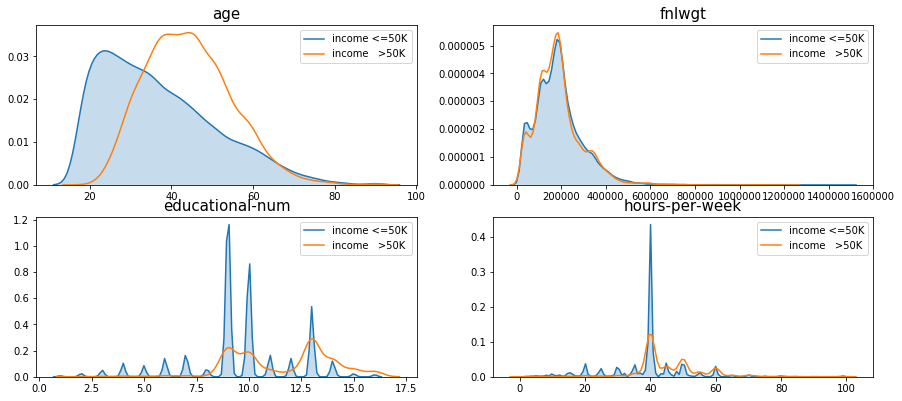

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(221)

con_var=['age', 'fnlwgt', 'educational-num','hours-per-week']
i=0
for x in con_var:
    plt.subplot(3, 2, i+1)
    i += 1
    ax1=sns.kdeplot(data_train[data_train['income'] == 0][x], shade=True,label="income <=50K")
    sns.kdeplot(data_train[data_train['income'] == 1][x], shade=False,label="income   >50K", ax=ax1)
    plt.title(x,fontsize=15)

plt.show()

As we see, the majority of people earn less than 50k per year. However, we observe that people earning more than 50K are in the middle of their career. We make this assumption as a function of age. it is observed that most people work 40 hours per week and that those who work longer earn the most.

We can see that the age column and fnlwgt are asymmetric. Linear models prefer normally distributed data, so later we will apply the log method to make them normally distributed. people who have the highest level of education than those who are more likely to trade and earn money.

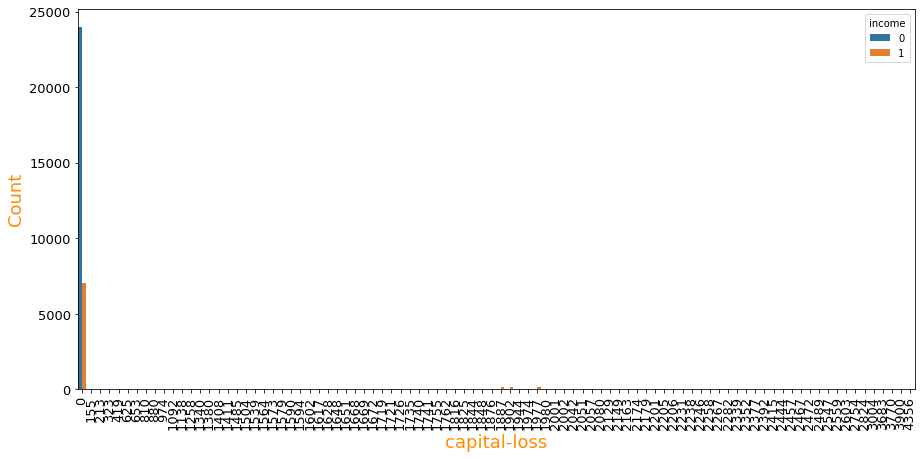

In [11]:
plt.figure(figsize=(15,7))

deg=["capital-loss"]

plt.subplot(1,1,1)
sns.countplot(x=deg[0],data=data_train,hue='income')
plt.xlabel(deg[0],color="darkorange",fontsize=18)
plt.ylabel("Count",color="darkorange",fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(rotation=90,fontsize=13)

plt.show()

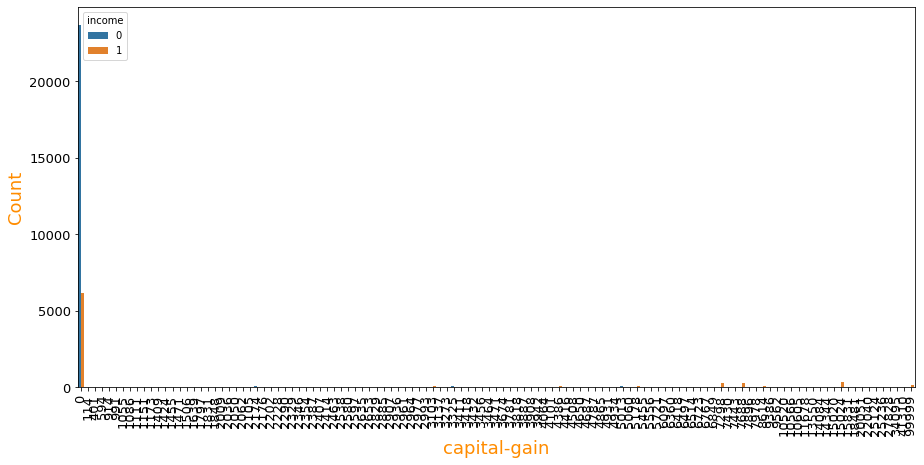

In [12]:
plt.figure(figsize=(15,7))

deg=["capital-gain"]

plt.subplot(1,1,1)
sns.countplot(x=deg[0],data=data_train,hue='income')
plt.xlabel(deg[0],color="darkorange",fontsize=18)
plt.ylabel("Count",color="darkorange",fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(rotation=90,fontsize=13)

plt.show()

Capital-gain and capital-loss are income from other sources and have no relevance here; later I will remove them.

----> Distribution graphs of categorical variables on the target

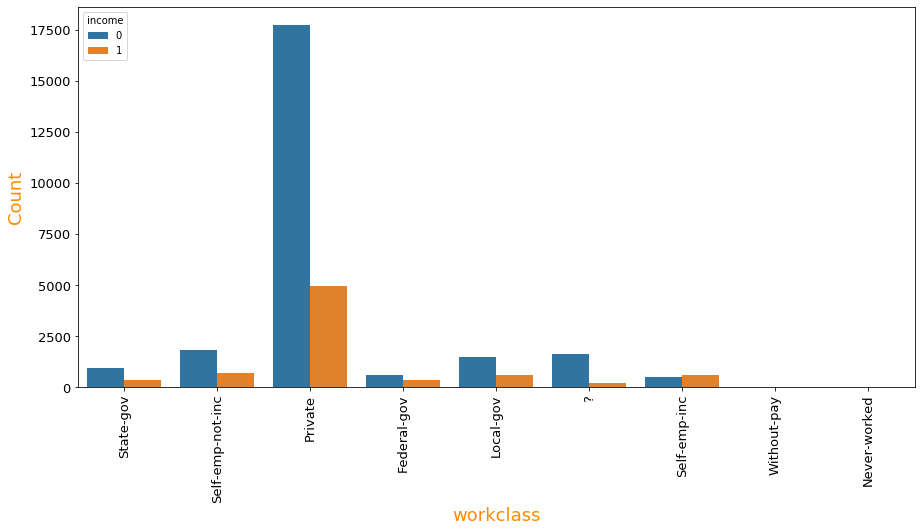

In [13]:
plt.figure(figsize=(15,7))

deg=["workclass"]

plt.subplot(1,1,1)
sns.countplot(x=deg[0],data=data_train,hue='income')
plt.xlabel(deg[0],color="darkorange",fontsize=18)
plt.ylabel("Count",color="darkorange",fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(rotation=90,fontsize=13)

plt.show()

It can be concluded that people working in the private sector earn much better than those in other classes.  
And also we conclude that there are missing values (?)

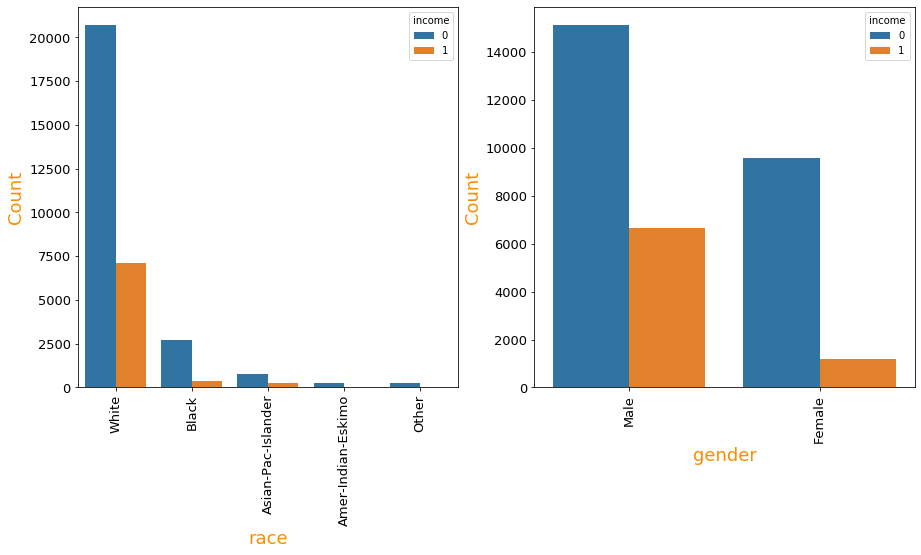

In [14]:
plt.figure(figsize=(15,7))

deg=["race","gender"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=data_train,hue='income')
    plt.xlabel(deg[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()

You notice that whites are lucky to work, I guess because most Americans are white. And also men are dominant at work.

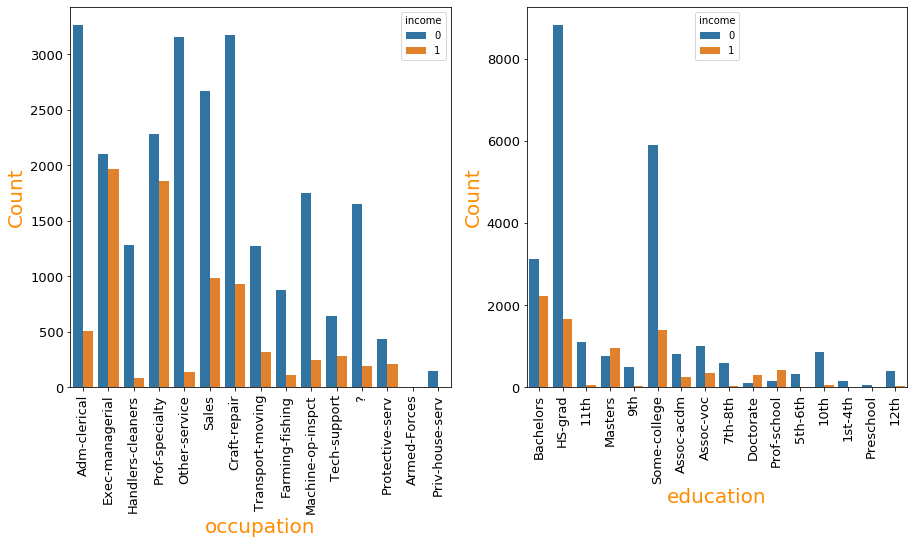

In [15]:
plt.figure(figsize=(15,7))

deg=["occupation","education"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=data_train,hue="income")
    plt.xlabel(deg[i],color="darkorange",fontsize=20)
    plt.ylabel("Count",color="darkorange",fontsize=20)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()

It can be concluded that people who have specific teaching and executive-managerial skills, and who hold a bachelor's degree in education, earn more. And also we conclude that there are missing values (?) For the occupation variable.

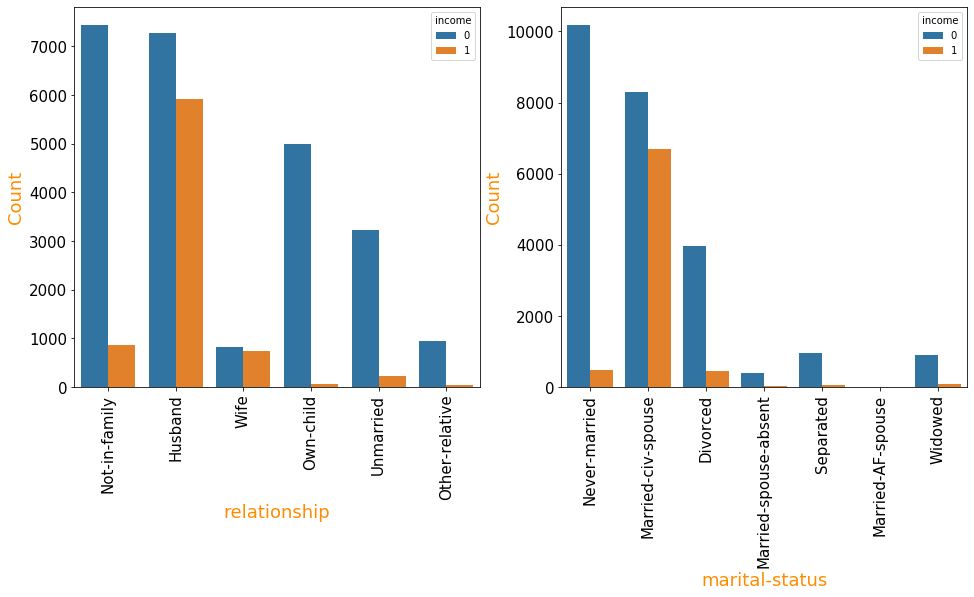

In [16]:
plt.figure(figsize=(16,7))

deg = ["relationship","marital-status"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=data_train,hue="income")
    plt.xlabel(deg[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)

plt.show()


We conclude that married men are the most successful.

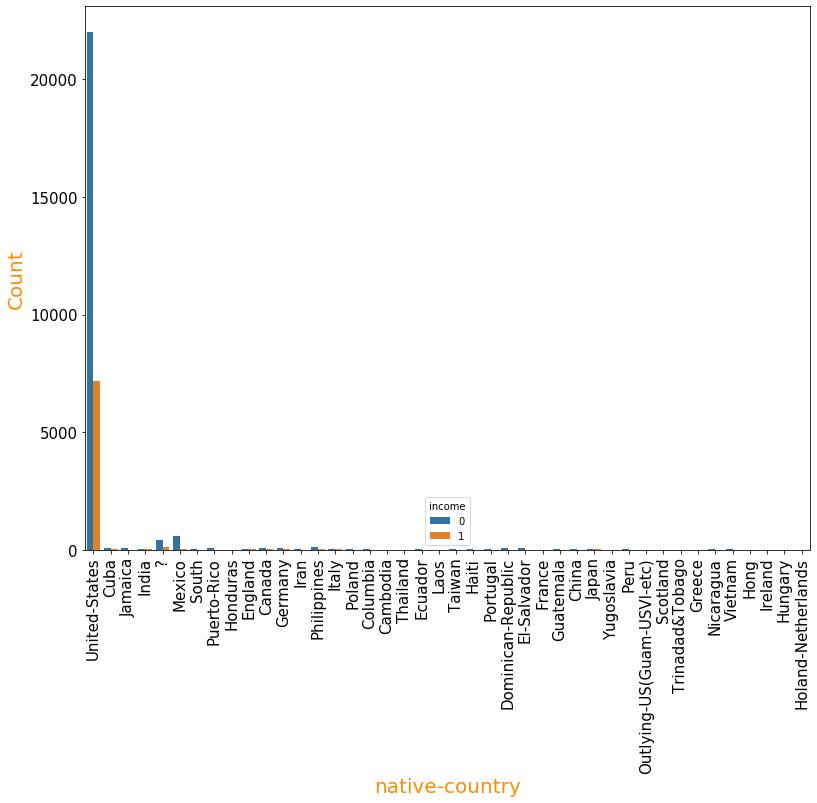

In [17]:
plt.figure(figsize=(13,10))
sns.countplot(x=data_train["native-country"],data=data_train,hue="income")
plt.xlabel("native-country",color="darkorange",fontsize=20)
plt.ylabel("Count",color="darkorange",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We note that all those who are in the US compared to their country of origin are the most hardworking and the most profitable, and this is normal because they are the most extended in the US, because it is their country of origin.

---> Show percentage of null values

In [18]:
x = data_train.isin(['?']).sum(axis=0)
x = dict(x)
# summarize the class distribution
for i in x:
    per = x[i] / len(data_train) * 100
    print('%s, Count of null values= %d, Percentage of null values= %.3f%%' % (i, x[i], per))

age, Count of null values= 0, Percentage of null values= 0.000%
workclass, Count of null values= 1836, Percentage of null values= 5.639%
fnlwgt, Count of null values= 0, Percentage of null values= 0.000%
education, Count of null values= 0, Percentage of null values= 0.000%
educational-num, Count of null values= 0, Percentage of null values= 0.000%
marital-status, Count of null values= 0, Percentage of null values= 0.000%
occupation, Count of null values= 1843, Percentage of null values= 5.660%
relationship, Count of null values= 0, Percentage of null values= 0.000%
race, Count of null values= 0, Percentage of null values= 0.000%
gender, Count of null values= 0, Percentage of null values= 0.000%
capital-gain, Count of null values= 0, Percentage of null values= 0.000%
capital-loss, Count of null values= 0, Percentage of null values= 0.000%
hours-per-week, Count of null values= 0, Percentage of null values= 0.000%
native-country, Count of null values= 583, Percentage of null values= 1.790

---> Correlation matrix between numeric values

I will convert all categorical variables to numeric variables to calculate the correlation matrix.

In [19]:
categorical_data =data_train.select_dtypes(include=['object'])
numerical_data = data_train.select_dtypes(exclude=['object'])
print('categorical data : ',categorical_data.columns)
print('numerical data : ',numerical_data.columns)

categorical data :  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')
numerical data :  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')


In [20]:
encoder = LabelEncoder()
categorical_data_to_numerical = categorical_data.apply(encoder.fit_transform)

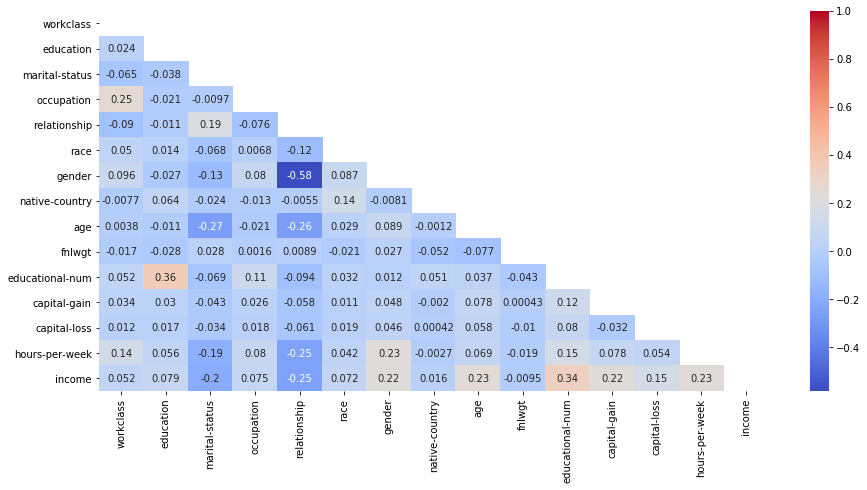

In [21]:
### concatenating numerical and categorical data which was enconded
data_train = pd.concat([categorical_data_to_numerical, numerical_data], axis=1)

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)

#Correlation Matrix with  full data
correlations = data_train.corr()
matrix = np.triu(correlations.corr())
sns.heatmap(correlations, annot= True,  mask=matrix, cmap='coolwarm', ax=ax1)

---> Correlation with the target variable

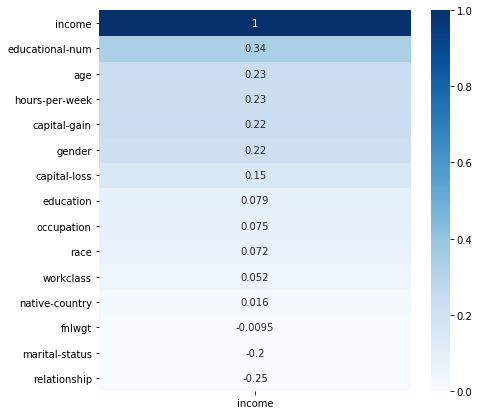

In [22]:
fig = plt.figure(figsize=((7,7)))
ax2 = fig.add_subplot(111)
#Correlation Matix with Target Variable
sns.heatmap(data_train.corr()[['income']].sort_values('income').tail(15),vmin=0, cmap='Blues', annot=True, ax=ax2)
ax2.invert_yaxis()

We can observe that we do not have strongly correlated variables. Only 0.58 gender and relationship (negatively correlated), followed by education and education number of years 0.36 (positively correlated).

Additionally, we can observe the correlation matrix graph above where we can see the correlation with our target variable.

Education number of year is positively correlated with the target (0.34). This is reasonable because the more education you have, the more likely you are to have a higher salary. Age is another variable positively correlated with income (0.23). Hours per week is another variable positively correlated with income (0.23). The more hours you work, the higher your salary will tend to be.

Then I will remove all the variables that have a correlation between 0.2 and -0.2 (-0.2 <= corr <= +0.2)

# Data cleaning / transformation

Removal of capital-gain and capital-loss variablessupprision des variables capital-gain et capital-loss

In [23]:
data_train.drop(['capital-gain','capital-loss'], axis=1, inplace=True)

Remove all variables that have a correlation between 0,2 and -0,2 (-0,2 <= corr <= +0,2)

In [24]:
data = data_train.corr()[['income']].sort_values('income')
data = dict(data['income'])

for i in data:
    if - 0.2 <= data[i] <= 0.2:
        data_train.drop([i], axis=1, inplace=True)

See if there are still any missing values.

In [25]:
data = data_train.isin(['?']).sum(axis=0)
data = dict(data)
# summarize the class distribution
for i in data:
    per = data[i] / len(data_train) * 100
    print('%s, Count of null values= %d, Percentage of null values= %.3f%%' % (i, data[i], per))

relationship, Count of null values= 0, Percentage of null values= 0.000%
gender, Count of null values= 0, Percentage of null values= 0.000%
age, Count of null values= 0, Percentage of null values= 0.000%
educational-num, Count of null values= 0, Percentage of null values= 0.000%
hours-per-week, Count of null values= 0, Percentage of null values= 0.000%
income, Count of null values= 0, Percentage of null values= 0.000%


In fact, the variables containing the missing values were removed due to the weak relationship between the target variable.

---> will transform the age column because it is skewed (Linear models prefer normally distributed data)

(array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75]),
 <a list of 10 Text xticklabel objects>)

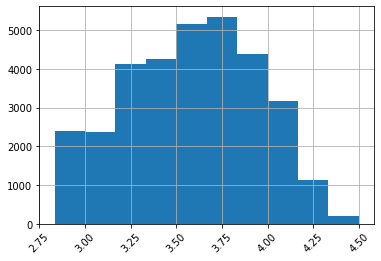

In [26]:
data_train['age'] = np.log(data_train['age'])

data_train['age'].hist()
plt.xticks(rotation=45)

I will now normalize our data by making the variables have different ranges (the purpose of normalization is to change the values of the numeric columns in the dataset to a common measure, without distorting the differences in the ranges) .

In [27]:
scaler = StandardScaler()
X = data_train.iloc[:,:-1]
Y = data_train.iloc[:,-1]
scaler.fit(X)
X_scale = scaler.transform(X)
X_scale = pd.DataFrame(X_scale, columns = X.columns)

# Creation and optimization of models

Divide the learning set into two subsets: 80% for training and 20% for testing.

In [28]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_scale, Y,
                                                                                test_size=validation_size, random_state=seed)

---> The cross-validation technique

In [29]:
# seed : an option that we will use to make sure we have exactly the same subsets during cross validation.
seed = 7
# Performance measurement : accuracy estimates the accuracy of a model. This is the equivalent of the model's success rate.
performance = 'accuracy'
from sklearn import svm
# Definition of models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('svm', SVC()))
# Evaluation of the three models
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=performance)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

C:\Users\Hiri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.806358 (0.005977)


C:\Users\Hiri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.794457 (0.006479)


C:\Users\Hiri\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


svm: 0.825207 (0.008096)


---> Applying these three models to validation data

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print('knn : ',accuracy_score(Y_validation, predictions))

CART = DecisionTreeClassifier()
CART.fit(X_train, Y_train)
predictions = CART.predict(X_validation)
print('CART : ',accuracy_score(Y_validation, predictions))


svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print('svm : ',accuracy_score(Y_validation, predictions))

knn :  0.8060801473975127
CART :  0.7954859511745739
svm :  0.8245048364808844


After having obtained the performance results (accuracy) of the three models, we can then choose which is the best of the three models to classify our problem.

# Model test

Then, according to the results obtained previously, the SVM model is the most suitable model to classify our problem.

Now we will test the performance of the SVM model against the test set.

In fact, we will apply the model to the validation set, calculate the accuracy of the model, its confusion matrix, and edit a classification report containing the following performance measures: precision, recall, and F-score.

----> To perform this task, we process the test data as we did for the train data.

In [31]:
#This function to avoid the spaces that exist in our train data
def delete_space(dataframe):
    for i in dataframe.columns:
        try:
            dataframe[i] = dataframe[i].str.strip()
        except AttributeError:
            # data is not a string, cannot strip
            dataframe[i] = dataframe[i]

delete_space(data_test)

In [32]:
#class 0 for values <= 50K
#class 1 for values> 50K

from collections import Counter
data_test['income'] = data_test['income'].map({'<=50K.': 0, '>50K.': 1}).astype(int)
# summarize the class distribution
target_test = data_test['income']
counter = Counter(target_test)
for k,v in counter.items():
    per = v / len(target_test) * 100
    print('Class= %s, Count= %d, Percentage= %.3f%%' % (k, v, per))

Class= 0, Count= 12435, Percentage= 76.377%
Class= 1, Count= 3846, Percentage= 23.623%


In [33]:
data_test = data_test[data_train.columns]

In [34]:
categorical_data_test =data_test.select_dtypes(include=['object'])
numerical_data_test = data_test.select_dtypes(exclude=['object'])
categorical_data_test_to_numerical = categorical_data_test.apply(encoder.fit_transform)
data_test = pd.concat([categorical_data_test_to_numerical, numerical_data_test], axis=1)

In [35]:
data_test['age'] = np.log(data_test['age'])

In [36]:
scaler = StandardScaler()
X_test = data_test.iloc[:,:-1]
Y_test = data_test.iloc[:,-1]
# I kept the same X to maintain the same transformation as for the train data.
scaler.fit(X)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X.columns)

---> Appliquation du modèle du SVM sur l’ensemble de test

In [37]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_test)
print('Accuracy : ',accuracy_score(Y_test, predictions))
print('------------------------------------------------------------')
print('Confusion matrix : \n\n ',confusion_matrix(Y_test, predictions))
print('------------------------------------------------------------')
print('precision, recall, and F-score : \n\n', classification_report(Y_test, predictions))

Accuracy :  0.8280203918678214
------------------------------------------------------------
Confusion matrix : 

  [[11774   661]
 [ 2139  1707]]
------------------------------------------------------------
precision, recall, and F-score : 

               precision    recall  f1-score   support

           0       0.85      0.95      0.89     12435
           1       0.72      0.44      0.55      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.70      0.72     16281
weighted avg       0.82      0.83      0.81     16281

